## Table of contents

* [Prerequisites](#P)
* [1.SVMs search for the optimal hyperplane](#1)
* [1.1.How can we compare two hyperplanes? ](#1.1.)
* [1.2.Using the equation of the hyperplane ](#1.2.)
* [1.3.Problem with examples on the negative side ](#1.3.)
* [1.4.Does the hyperplane correctly classify the data? ](#1.4.)
* [1.5 Scale invariance ](#1.5.)
* [2. What is an optimization problem?](#2)
* [2.1. Unconstrained optimization problem ](#2.1)
* [2.2.Constrained optimization problem](#2.2)
* [2.3.Feasible set ](#2.3)
* [2.4. Multiple equality constraints and vector notation ](#2.4)
* [2.5. Inequality constraints](#2.5)
* [2.6. How do we solve an optimization problem?](#2.6)
* [3.The SVMs optimization problem ](#3)
* [3.1.Solving the Optimization Problem-Lagrange multipliers](#3.1)
* [3.2.The method of Lagrange multipliers ](#3.2)
* [3.3.The SVM Lagrangian problem ](#3.3)
* [3.4.The Wolfe dual problem](#3.4)
* [3.5. Karush-Kuhn-Tucker conditions](#3.5)
* [3.6.What to do once we have the multipliers?](#3.6)
* [4.Solving SVMs with a QP solver](#4)
* [4.1.Summary](#4.1)
* [ References ](#r)

## Grattiude:

This chapter is possible due to the References given below and thanks [Alexandre Kowalczyk](https://github.com/alexandrekow) for sharing such valuable knowledge for free.

**Note 1**: I had included the free [License](https://github.com/SyncfusionSuccinctlyE-Books/Support-Vector-Machines-Succinctly/blob/master/LICENSE)  in this folder.

**Note 2**: Except for the **Convex optimization code** and Data set,Rest of the Python code for visualization and plotting  is developed by [Anil R.Sarode](https://www.linkedin.com/in/anil-sarode-350556170/) 

## Prerequisites  <a class="anchor" id="P"></a>

Before start reading this chapter I strongly suggest that you already read the chapter [The Perceptron](https://github.com/AnilSarode/Machine-Learning-Digital-Book-/blob/master/The%20Perceptron/The%20Perceptron%20.ipynb). and you want to know to more you can also read [Prerequisites for SVM](https://github.com/AnilSarode/Machine-Learning-Digital-Book-/blob/master/Prerequisites%20for%20SVM/Prerequisites%20for%20SVM-Support%20Vector%20Machine%20.ipynb).  

## 1.SVMs search for the optimal hyperplane <a class="anchor" id="1"></a>

[The Perceptron](https://github.com/AnilSarode/Machine-Learning-Digital-Book-/blob/master/The%20Perceptron/The%20Perceptron%20.ipynb) has several advantages: it is a simple model, the algorithm is very easy to implement, and we have a theoretical proof that it will find a hyperplane that separates the data. However, its biggest weakness is that it will not find the same hyperplane every time. Why do we care? Because not all separating hyperplanes are equals. **If the Perceptron gives you a hyperplane that is very close to all the data points from one class, you have a right to believe that it will generalize poorly when given new data.**

SVMs do not have this problem. Indeed, instead of looking for a hyperplane, SVMs tries to find the hyperplane. We will call this the **optimal hyperplane**, and we will say that it is the one that best separates the data

### 1.1. How can we compare two hyperplanes? <a class="anchor" id="1.1."></a>

Because we cannot choose the optimal hyperplane based on our feelings, we need some sort of [metric](https://en.wikipedia.org/wiki/Metric_(mathematics)) that will allow us to compare two hyperplanes and say which one is superior to all others.

In this section, we will try to discover how we can compare two hyperplanes. In other words, we will search for a way to compute a number that allows us to tell which hyperplane separates the data the best. We will look at methods that seem to work, but then we will see why they do not work and how we can correct their limitations. Let us try with a simple attempt to compare two hyperplanes using only the equation of the hyperplane.



### 1.2.Using the equation of the hyperplane <a class="anchor" id="1.2."></a>

Given an example $(\mathbf{x},y)$ and a hyperplane, we wish to know how the example relates to the hyperplane.

One key element we already know is that if the value of $\mathbf{x}$ satisfies the equation of a line, then it
means it is on the line. It works in the same way for a hyperplane: for a data point  $\mathbf{x}$ and a
hyperplane defined by a vector  $\mathbf{w}$ and bias $b$, we will get if is on the hyperplane. 

But what if the point is not on the hyperplane?

Let us see what happens with an example. In Figure 1, the line is defined by $\mathbf{w}=(-0.4,-1)$ and $b=9$. When we use the equation of the hyperplane:

* for point $A(1,3)$ , using vector $\mathbf{a}=(1,3)$ we get  $\mathbf{w\cdot a}+b = 5.6$
* for point $B(3,5)$,  using vector $\mathbf{b}=(3,5)$ we get $\mathbf{w\cdot b}+b = 2.8$ 
* for point $C(5,7)$, using vector $\mathbf{c}=(5,7)$ we get $\mathbf{w\cdot c}+b = 0$

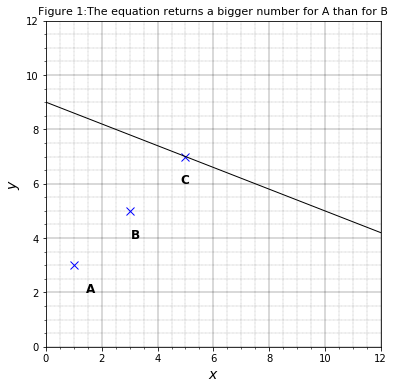

In [4]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

x=[1,3,5]
y=[3,5,7]
xs= np.arange(0,13,1)

w=[-0.4,-1]
b=9
a= -w[0]/w[1]
c=-b/w[1]

ys=a*xs+c

fig = plt.figure(figsize=(6,6))

plt.title('Figure 1:The equation returns a bigger number for A than for B',fontsize=11)

plt.plot(x,y,'bx',markersize=8)
plt.plot(xs,ys,'k',linewidth=1)

plt.xlabel(r'$x$',fontsize=14)
plt.ylabel(r'$y$',fontsize=14)

# Turn on the minor TICKS, which are required for the minor GRID
plt.minorticks_on()

# Customize the major grid
plt.grid(which='major', linestyle='-', linewidth='0.3', color='black')
# Customize the minor grid

plt.grid(which='minor', linestyle=':', linewidth='0.3', color='black')
plt.annotate(r'$\mathbf{A}$', xy=(1.4, 2),fontsize=12)
plt.annotate(r'$\mathbf{B}$', xy=(3, 4),fontsize=12)
plt.annotate(r'$\mathbf{C}$', xy=(4.8, 6),fontsize=12)

plt.ylim(0,12)
plt.xlim(0,12)
plt.show()


As you can see, when the point is not on the hyperplane we get a number different from zero. In fact, if we use a point far away from the hyperplane, we will get a bigger number than if we use a point closer to the hyperplane.

Another thing to notice is that the sign of the number returned by the equation tells us where the point stands with respect to the line. Using the equation of the line displayed in Figure 2, we get:


* for point $A(3,5)$ , using vector $\mathbf{a}=(3,5)$ we get  $\mathbf{w\cdot a}+b = 2.8$
* for point $B(5,7)$,  using vector $\mathbf{b}=(5,7)$ we get $\mathbf{w\cdot b}+b = 0$ 
* for point $C(7,9)$, using vector $\mathbf{c}=(7,9)$ we get $\mathbf{w\cdot c}+b = -2.8$


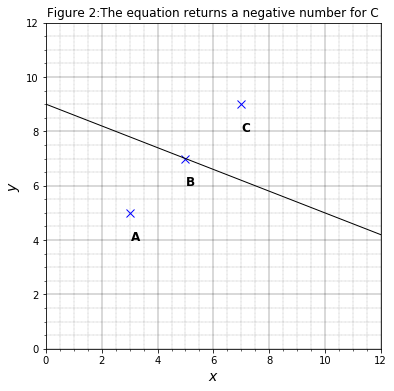

In [5]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

x=[3,5,7]
y=[5,7,9]
xs= np.arange(0,13,1)

w=[-0.4,-1]
b=9
a= -w[0]/w[1]
c=-b/w[1]

ys=a*xs+c

fig = plt.figure(figsize=(6,6))

plt.title('Figure 2:The equation returns a negative number for C',fontsize=12)

plt.plot(x,y,'bx',markersize=8)
plt.plot(xs,ys,'k',linewidth=1)

plt.xlabel(r'$x$',fontsize=14)
plt.ylabel(r'$y$',fontsize=14)

# Turn on the minor TICKS, which are required for the minor GRID
plt.minorticks_on()

# Customize the major grid
plt.grid(which='major', linestyle='-', linewidth='0.3', color='black')
# Customize the minor grid

plt.grid(which='minor', linestyle=':', linewidth='0.3', color='black')
plt.annotate(r'$\mathbf{A}$', xy=(3, 4),fontsize=12)
plt.annotate(r'$\mathbf{B}$', xy=(5, 6),fontsize=12)
plt.annotate(r'$\mathbf{C}$', xy=(7, 8),fontsize=12)

plt.ylim(0,12)
plt.xlim(0,12)
plt.show()


If the equation returns a positive number, the point is below the line, while if it is a negative number, it is above. Note that it is not necessarily visually above or below, because if you have a line like the one in Figure 3, it will be left or right, but the same logic applies. The sign of the number returned by the equation of the hyperplane allows us to tell if two points lie on the same side. In fact, this is exactly what the hypothesis function we defined in Chapter [The Perceptron](https://github.com/AnilSarode/Machine-Learning-Digital-Book-/blob/master/The%20Perceptron/The%20Perceptron%20.ipynb) does.

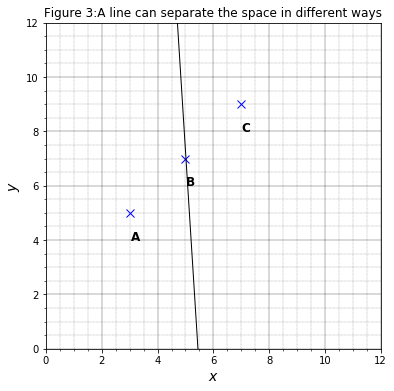

In [6]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

x=[3,5,7]
y=[5,7,9]
xs= np.arange(0,13,1)

w=[-35.75148987-0.75,   7.44997542-0.75,   0.4109408 ] # taken from perceptron W1[133] 

b=w[0]
a= -w[1]/w[2]
c=-b/w[2]

ys=a*xs+c

fig = plt.figure(figsize=(6,6))

plt.title('Figure 3:A line can separate the space in different ways',fontsize=12)

plt.plot(x,y,'bx',markersize=8)
plt.plot(xs,ys,'k',linewidth=1)

plt.xlabel(r'$x$',fontsize=14)
plt.ylabel(r'$y$',fontsize=14)

# Turn on the minor TICKS, which are required for the minor GRID
plt.minorticks_on()

# Customize the major grid
plt.grid(which='major', linestyle='-', linewidth='0.3', color='black')
# Customize the minor grid

plt.grid(which='minor', linestyle=':', linewidth='0.3', color='black')
plt.annotate(r'$\mathbf{A}$', xy=(3, 4),fontsize=12)
plt.annotate(r'$\mathbf{B}$', xy=(5, 6),fontsize=12)
plt.annotate(r'$\mathbf{C}$', xy=(7, 8),fontsize=12)

plt.ylim(0,12)
plt.xlim(0,12)
plt.show()


We now have the beginning of a solution for comparing two hyperplanes.

Given a training example $(\mathbf{x},y)$ and a hyperplane defined by a vector $\mathbf{w}$ and bias $b$ , we compute the number $\beta=\mathbf{w\cdot x}+b$ to know how far the point is from the hyperplane.

Given a training set: $\mathcal{D}=\{(\mathbf{x_{i}},y_{i})\mid \mathbf{x_{i}} \in R^{n},y_{i}\in \{-1,1\} \}_{i=1}^{i=m}$  ,we compute $\beta$ for each training example, and say that the number $B$ is the smallest we encounter.

$$
\begin{align*}B= 
    \min_{i= 1\dots m } \beta_{i}
\end{align*}
$$

If we need to choose between two hyperplanes, we will then select the one for which $B$ is the largest.

To be clear, this means that if we have $k$ hyperplanes, we will compute $\begin{align*}\max_{i=1\dots k} B_{i}\end{align*}$ and select the hyperplane having this $B_{i}$ .



### 1.3.Problem with examples on the negative side <a class="anchor" id="1.3."></a>

Unfortunately, using the result of the hyperplane equation has its limitations. The problem is that taking the minimum value does not work for examples on the negative side (the ones for which the equation returns a negative value).

**Remember that we always wish to take the $\beta$ of the point being the closest to the hyperplane.** Computing $B$ with examples on the positive side actually does this. Between two points with $\beta =+5$ and $\beta=+1$ , we pick the one having the smallest number, so we choose $+1$. However, between two examples having $\beta=-5$ and $\beta=-1$, this rule will pick $-5$ because $-5$ is smaller than $-1$ , but the closest point is actually the one with $\beta=-1$.

One way to fix this problem is to consider the **absolute** value of $\beta$.

Given a data set $\mathcal{D}$ , we compute $\beta$ for each example and say that $B$ is the $\beta$ having the smallest absolute value

$$
\begin{align*}B= 
    \min_{i= 1\dots m } {|\beta_{i}|}
\end{align*}
$$


### 1.4.Does the hyperplane correctly classify the data?  <a class="anchor" id="1.4."></a>

Computing the number $B$ allows us to select a hyperplane. However, using only this value, we might pick the wrong one. Consider the case in Figure 4: the examples are correctly classified, and the value of $B$ computed using the last formula is $2$.

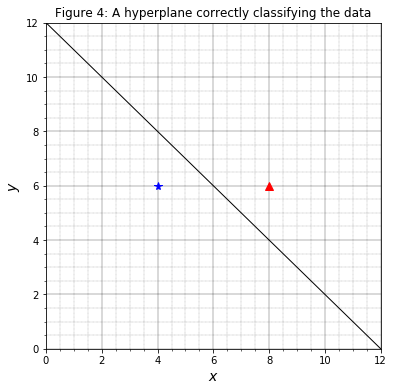

In [7]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

x=[4,8]
y=[6,6]
xs= np.arange(0,13,1)


ys=-1*xs+12

fig = plt.figure(figsize=(6,6))

plt.title('Figure 4: A hyperplane correctly classifying the data',fontsize=12)

plt.plot(x[0],y[0],'b*',x[1],y[1],'r^',markersize=8)
plt.plot(xs,ys,'k',linewidth=1)

plt.xlabel(r'$x$',fontsize=14)
plt.ylabel(r'$y$',fontsize=14)

# Turn on the minor TICKS, which are required for the minor GRID
plt.minorticks_on()

# Customize the major grid
plt.grid(which='major', linestyle='-', linewidth='0.3', color='black')
# Customize the minor grid

plt.grid(which='minor', linestyle=':', linewidth='0.3', color='black')
# plt.annotate(r'$\mathbf{A}$', xy=(3, 4),fontsize=12)
# plt.annotate(r'$\mathbf{B}$', xy=(5, 6),fontsize=12)
# plt.annotate(r'$\mathbf{C}$', xy=(7, 8),fontsize=12)

plt.ylim(0,12)
plt.xlim(0,12)
plt.show()


In Figure 5, the examples are **incorrectly classified**, and the value of $B$ is also 2. This is problematic because using $B$ , we do not know which hyperplane is better. In theory, they look equally good, but in reality, we want to pick the one from Figure 4.

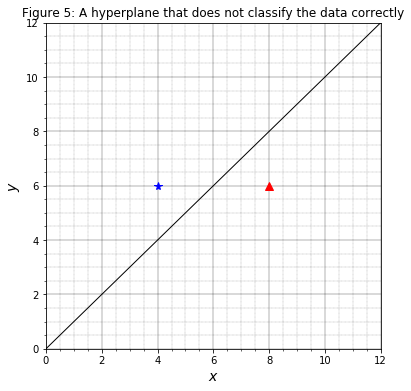

In [8]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

x=[4,8]
y=[6,6]
xs= np.arange(0,13,1)


ys=1*xs+0

fig = plt.figure(figsize=(6,6))

plt.title('Figure 5: A hyperplane that does not classify the data correctly',fontsize=12)

plt.plot(x[0],y[0],'b*',x[1],y[1],'r^',markersize=8)
plt.plot(xs,ys,'k',linewidth=1)

plt.xlabel(r'$x$',fontsize=14)
plt.ylabel(r'$y$',fontsize=14)

# Turn on the minor TICKS, which are required for the minor GRID
plt.minorticks_on()

# Customize the major grid
plt.grid(which='major', linestyle='-', linewidth='0.3', color='black')
# Customize the minor grid

plt.grid(which='minor', linestyle=':', linewidth='0.3', color='black')
# plt.annotate(r'$\mathbf{A}$', xy=(3, 4),fontsize=12)
# plt.annotate(r'$\mathbf{B}$', xy=(5, 6),fontsize=12)
# plt.annotate(r'$\mathbf{C}$', xy=(7, 8),fontsize=12)

plt.ylim(0,12)
plt.xlim(0,12)
plt.show()


How can we adjust our formula to meet this requirement?

Well, there is one component of our training example $(\mathbf{x},y)$ that we did not use: the $y$!

If we multiply $\beta$ by the value of $y$ , we change its sign. Let us call this new number $f$:

$$
f=y\times \beta
$$

$$
f=y(\mathbf{w\cdot x}+b)
$$

The sign of $f$ will always be:

* Positive if the point is correctly classified
* Negative if the point is incorrectly classified

Given a data set $\mathcal{D}$ , we can compute:

$$
\begin{align*}F= 
    \min_{i= 1\dots m } f_{i}
\end{align*}
$$


$$
\begin{align*}F= 
    \min_{i= 1\dots m } y_{i}(\mathbf{w\cdot x}+b)
\end{align*}
$$


With this formula, when comparing two hyperplanes, we will still select the one for which is the $F$ largest. The added bonus is that in special cases like the ones in Figure 4 and Figure 5, we will always pick the hyperplane that classifies correctly (because will have a positive value,while its value will be negative for the other hyperplane).

In the literature, the number $f$ has a name, it is called the **functional margin** of an example; its value can be computed in Python, as shown in Code below. Similarly, the number $F$ is known as the **functional margin of the data set $\mathcal{D}$**.


In [9]:
import numpy as np

# Compute the functional margin of an example (x,y)
# with respect to a hyperplane defined by w and b.

def example_functional_margin(w, b, x, y):
    result = y * (np.dot(w, x) + b)
    return result
# Compute the functional margin of a hyperplane
# for examples X with labels y.

def functional_margin(w, b, X, y):
    return np.min([example_functional_margin(w, b, x, y[i]) for i, x in enumerate(X)])

Using this formula, we find that the functional margin of the hyperplane in Figure 4 is +2, while in Figure 5 it is -2. Because it has a bigger margin, we will select the first one

Remember, we wish to choose the hyperplane with the largest margin. i.e once we know the closest data point (from the hyperplane ) we try to select that hyper plane which give largest margin for that closest distance.  

In [17]:
X = np.array([[4,6],[8, 6]])
y = [1,-1]
b =-12
w= np.array([1, 1])
print(np.dot(w, X[1]) + b)
print(functional_margin(w, b, X, y))

2
-2


### 1.5 Scale invariance   <a class="anchor" id="1.5."></a>

It looks like we found a good way to compare the two hyperplanes this time. However, there is a
major problem with the functional margin: is not scale invariant.

Given a vector $\mathbf{w}_{1}=(2,1)$ and bias $b_{1}=5$ , if we multiply them by $10$, we get $w_{2}=(20,10)$ and $b_{2}=50$. We say we **rescaled** them.


The vectors $\mathbf{w}_{1}$ and $\mathbf{w}_{2}$ , represent the same hyperplane because they have the same unit vector.**The hyperplane being a plane orthogonal to a vector $\mathbf{w}$**, it does not matter how long the vector is. The only thing that matters is its direction, which, as we know that,is given by its unit vector. Moreover, when tracing the hyperplane on a graph, the coordinate of the intersection between the vertical axis and the hyperplane will be $(0,b/w_{1})$ , so the hyperplane does not change because of the rescaling of $b$, either.


The problem, as we can see in Code below, is that when we compute the functional margin with $\mathbf{w}_{2}$ , we get a number ten times bigger than with $\mathbf{w}_{1}$ . This means that given any hyperplane, we can always find one that will have a larger functional margin, just by rescaling $\mathbf{w}$ and $b$ .

**Note:** [The hyperplane being a plane orthogonal to a vector](https://www.svm-tutorial.com/2014/11/svm-understanding-math-part-2/) understand more.

In [11]:
x = np.array([1, 1])
y = 1

b_1 = 5
w_1 = np.array([2, 1])

w_2 = w_1 * 10
b_2 = b_1 * 10

print(example_functional_margin(w_1, b_1, x, y)) 
print(example_functional_margin(w_2, b_2, x, y))

8
80


To solve this problem, we only need to make a small adjustment. Instead of using the vector $\mathbf{w}$ , we will use its unit vector. To do so, we will divide $\mathbf{w}$ by its norm. In the same way, we will divide $b$ by the norm $\mathbf{w}$ of to make it scale invariant as well.

Recall the formula of the functional margin: $f=y(\mathbf{w\cdot x}+b)$

We modify it and obtain a new number $\gamma$:

$$
\gamma=y\bigg(\frac{\mathbf{w}}{\|\mathbf{w}\|}\cdot \mathbf{x}+\frac{b}{\|\mathbf{w}\|}\bigg)
$$

As before, given a data set $mathcal{D}$ , we can compute:

$$
\begin{align*}M= 
    \min_{i= 1\dots m } \gamma_{i}
\end{align*}
$$

$$
\begin{align*}M= 
    \min_{i= 1\dots m }y_{i}\bigg(\frac{\mathbf{w}}{\|\mathbf{w}\|}\cdot \mathbf{x}+\frac{b}{\|\mathbf{w}\|}\bigg)
\end{align*}
$$

The advantage of $\gamma$ is that it gives us the same number no matter how large is the vector $\mathbf{w}$ that we choose. The number $\gamma$ also has a name—it is called the **geometric margin** of a training example, while $M$ is the geometric margin of the dataset. A Python implementation is shown in below.

In [18]:
# Compute the geometric margin of an example (x,y)
# with respect to a hyperplane defined by w and b.
def example_geometric_margin(w, b, x, y):
    norm = np.linalg.norm(w)
    result = y * (np.dot(w/norm, x) + b/norm)
    return result

# Compute the geometric margin of a hyperplane
# for examples X with labels y.
def geometric_margin(w, b, X, y):
    return np.min([example_geometric_margin(w, b, x, y[i])for i, x in enumerate(X)])

We can verify that the geometric margin behaves as expected. In Code Listing below, the function returns the same value for the vector $\mathbf{w_{1}}$ or its rescaled version $\mathbf{w_{2}}$ .

In [19]:
x = np.array([1,1])
y = 1

b_1 = 5
w_1 = np.array([2,1])

w_2 = w_1*10
b_2 = b_1*10

print(example_geometric_margin(w_1, b_1, x, y)) 
print(example_geometric_margin(w_2, b_2, x, y)) 

3.577708763999664
3.577708763999664


It is called the geometric margin because we can retrieve this formula using simple geometry. It measures the distance between $\mathbf{x}$ and the hyperplane.

In Figure 6, we see that the point $X'$ is the orthogonal projection of $X$ into the hyperplane. We wish to find the distance $d$ between $X$ and $X'$.

![](fig0.png)
$$\mathbf{Figure \ 6}: \mathbf{The \ geometric \ margin \ is \ the \ distance \ d \ between \ the \ point \ X \ and \ the \ hyperplane} $$

The vector $\mathbf{k}$ has the same direction as the vector $\mathbf{w}$ , so they share the same unit vector$\frac{\mathbf{w}}{\|\mathcal{w}\|}$ . We know that the norm of $\mathbf{k}$ is $d$ , so the vector can be defined by $\mathbf{k}=d\frac{\mathbf{w}}{\|\mathcal{w}\|}$.

Moreover, we can see that $\mathbf{x'}=\mathbf{x}-\mathbf{k}$ , so if we substitute for $\mathbf{k}$ and do a little bit of algebra, we get:

$$
\mathbf{x'}=\mathbf{x}-d\frac{\mathbf{w}}{\|\mathcal{w}\|}
$$

Now, the point $X'$ is on the hyperplane. It means that $\mathbf{x}'$ (The vector representing the point $X'$)satisfies the equation of the hyperplane,
and we have:

$$
\mathbf{w\cdot x'}+b=0
$$

$$
\mathbf{w}\cdot \bigg( \mathbf{x}-d\frac{\mathbf{w}}{\|\mathcal{w}\|}\bigg)+b=0
$$


$$
\mathbf{w}\cdot \mathbf{x}-d\frac{\mathbf{w\cdot \mathbf{w}}}{\|\mathcal{w}\|}+b=0
$$

$$
\mathbf{w}\cdot \mathbf{x}-d\frac{\|\mathcal{w}\|^{2}}{\|\mathcal{w}\|}+b=0
$$

$$
\mathbf{w}\cdot \mathbf{x}-d{\|\mathcal{w}\|}+b=0
$$

$$
d=\frac{\mathbf{w}\cdot \mathbf{x}+b}{\|\mathcal{w}\|}
$$

$$
d=\frac{\mathbf{w}}{\|\mathbf{w}\|}\cdot \mathbf{x}+\frac{b}{\|\mathbf{w}\|}
$$

Eventually, as we did before, we multiply by to ensure that we select a hyperplane that correctly classifies the data, and it gives us the geometric margin formula we saw earlie
$$
\gamma=y\bigg(\frac{\mathbf{w}}{\|\mathbf{w}\|}\cdot \mathbf{x}+\frac{b}{\|\mathbf{w}\|}\bigg)
$$

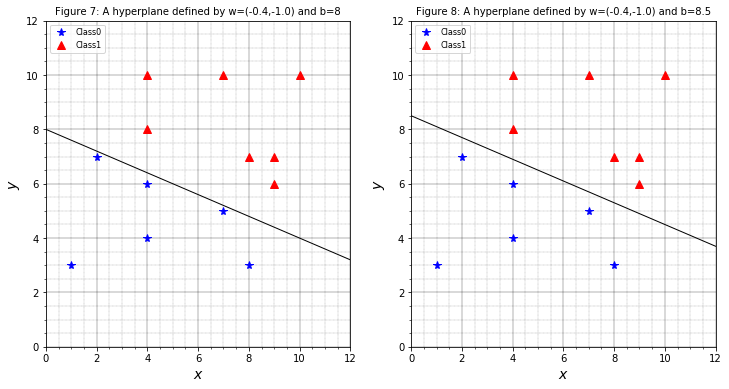

In [21]:
positive_x = [[2,7],[8,3],[7,5],[4,4],[4,6],[1,3],[2,5]]
negative_x = [[8,7],[4,10],[9,7],[7,10],[9,6],[4,8],[10,10]]

X = np.vstack((positive_x, negative_x))
y = np.hstack((np.ones(len(positive_x)), -1*np.ones(len(negative_x))))
w = np.array([-0.4, -1])
x= np.arange(0,13,1)

a1=X[0:6,0]
b1=X[0:6,1]
a2=X[7:14,0]
b2=X[7:14,1]

fig = plt.figure(figsize=(12, 6))

for k, b in enumerate([8,8.5]):
    ax=plt.subplot(1, 2, k + 1)
    
    a= -w[0]/w[1]
    c=-b/w[1]
    y=a*x+c

    plt.plot(a1,b1,"b*",a2,b2,"r^",markersize=8)
    plt.plot(x,y,'k',linewidth=1)
    plt.xlabel(r'$x$',fontsize=14)
    plt.ylabel(r'$y$',fontsize=14)
    # Turn on the minor TICKS, which are required for the minor GRID
    plt.minorticks_on()

    # Customize the major grid
    plt.grid(which='major', linestyle='-', linewidth='0.3', color='black')
    # Customize the minor grid

    plt.grid(which='minor', linestyle=':', linewidth='0.3', color='black')
    plt.legend(["Class0", "Class1"], loc="upper left",prop=dict(size=8))
    ax.set_title("Figure {}: A hyperplane defined by w=({},{}) and b={}".format(k+7,w[0],w[1],b),fontsize=10)
    plt.ylim(0,12)
    plt.xlim(0,12)
plt.show()
    

Now that we have defined the geometric margin, let us see how it allows us to compare two hyperplanes. We can see that the hyperplane in Figure 7 is closer to the blue star examples than to the red triangle examples as compared to the one in Figure 8. As a result, we expect its geometric margin to be smaller.

Code Listing below uses the function defined  as `geometric_margin` to compute the geometric margin for each hyperplane. As expected from Figure 8, the geometric margin of the second hyperplane defined by $\mathbf{w}=(-0.4,-1)$ and $b=8.5$ is larger $(0.64 > 0.18)$. Between the two, we would select this hyperplane.

In [22]:
# Compare two hyperplanes using the geometrical margin.
positive_x = [[2,7],[8,3],[7,5],[4,4],[4,6],[1,3],[2,5]]
negative_x = [[8,7],[4,10],[9,7],[7,10],[9,6],[4,8],[10,10]]

X = np.vstack((positive_x, negative_x))
y = np.hstack((np.ones(len(positive_x)), -1*np.ones(len(negative_x))))

w = np.array([-0.4, -1])
b = 8

# change the value of b
print(geometric_margin(w, b, X, y)) # 0.185695338177
print(geometric_margin(w, 8.5, X, y))

0.18569533817705164
0.6499336836196807


We see that to compute the geometric margin for another hyperplane, we just need to modify the value of $\mathbf{w}$ or $\mathbf{b}$ .We could try to change it by a small increment to see if the margin gets larger, but it is kind of random, and it would take a lot of time. Our objective is to find the optimal hyperplane for a dataset **among all possible hyperplanes**, and there is an infinity of hyperplanes.

**Note: Finding the optimal hyperplane is just a matter of finding the values of $\mathbf{w}$ and $\mathbf{b}$
for which we get the largest geometric margin.**

How can we find the value of $\mathbf{w}$ that produces the largest geometric margin? Luckily for us, mathematicians have designed tools to solve such problems. To find $\mathbf{w}$ and ${b}$ , we need to solve
what is called an **optimization problem**. Before looking at what the optimization problem is for
SVMs, let us do a quick review of what an optimization problem is

## 2. What is an optimization problem? <a class="anchor" id="2"></a>

### 2.1. Unconstrained optimization problem <a class="anchor" id="2.1"></a>

The goal of an **optimization problem** is to minimize or maximize a function with respect to some variable $x$ (that is, to find the value of $x$ for which  the function returns its minimum or maximum value). For instance, the problem in which we want to find the minimum of the function $f(x)=x^2$ is written:

$$
\underset{x}{\text{minimize}} f(x)
$$

Or, alternatively:

$$
\begin{align*}
    \min_{x} f(x)
\end{align*}
$$

In this case, we are free to search amongst all possible values of $x$. We say that the problem is **unconstrained.** As we can see in Figure 9, the minimum of the function is zero at $x=0$.

<Figure size 432x288 with 0 Axes>

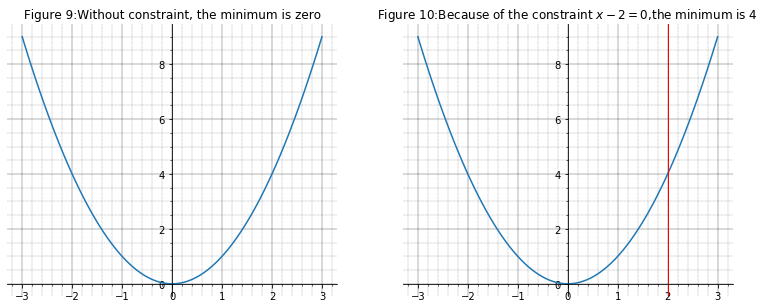

In [69]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
#ax = fig.add_subplot(1, 1, 1)
fig, ((ax1,ax2))= plt.subplots(1,2,figsize=(13,5))
x= np.arange(-3,3.05,0.05)
y=x**2
ax1.plot (x,y)
ax1.set_title('Figure 9:Without constraint, the minimum is zero',fontsize=12)
ax1.spines['left'].set_position(('data', 0.0))
ax1.spines['bottom'].set_position(('data', 0.0))
ax1.spines['right'].set_color('none')
ax1.spines['top'].set_color('none')
# Turn on the minor TICKS, which are required for the minor GRID
ax1.minorticks_on()

# Customize the major grid
ax1.grid(which='major', linestyle='-', linewidth='0.3', color='black')
# Customize the minor grid

ax1.grid(which='minor', linestyle=':', linewidth='0.3', color='black')

ax2.plot (x,y)
ax2.axvline(x=2,color='r', linewidth='1')
ax2.set_title(r'Figure 10:Because of the constraint $x-2=0$,the minimum is $4$',fontsize=12)
ax2.spines['left'].set_position(('data', 0.0))
ax2.spines['bottom'].set_position(('data', 0.0))
ax2.spines['right'].set_color('none')
ax2.spines['top'].set_color('none')
# Turn on the minor TICKS, which are required for the minor GRID
ax2.minorticks_on()

# Customize the major grid
ax2.grid(which='major', linestyle='-', linewidth='0.3', color='black')
# Customize the minor grid

ax2.grid(which='minor', linestyle=':', linewidth='0.3', color='black')


### 2.2.  Constrained optimization problem <a class="anchor" id="2.2"></a>

### Single equality constraint

Sometimes we are not interested in the minimum of the function by itself, but rather its minimum when some constraints are met. In such cases, we write the problem and add the constraints preceded by $\mathbf{subject\ to }$, which is often abbreviated **s.t** For instance, if we wish to know the minimum $f$ of but restrict the value of $x$ to a specific value, we can write:

$$
\begin{equation}
\begin{aligned}
\underset{x}{\text{minimize}} f(x)\\
\textrm{subject to } \ x=2\\
\end{aligned}
\end{equation}
$$

This example is illustrated in Figure 10. In general, constraints are written by keeping zero on the right side of the equality so the problem can be rewritten:

$$
\begin{equation}
\begin{aligned}
\underset{x}{\text{minimize}} f(x)\\
\textrm{subject to } \ x-2=0\\
\end{aligned}
\end{equation}
$$

Using this notation, we clearly see that the constraint is an **affine function** while the objective function $f$ is a **quadratic function**. Thus we call this problem a **quadratic optimization problem** or a Quadratic Programming (QP) problem.

### 2.3.Feasible set  <a class="anchor" id="2.3"></a>

The set of variables that satisfies the problem constraints is called the **feasible set** (or feasible region). When solving the optimization problem, the solution will be picked from the feasible set. In Figure 10, the feasible set contains only one value, so the problem is trivial. However, when we manipulate functions with several variables, such as $f(x,y)=x^{2}+y^{2}$ , it allows us to know from which values we are trying to pick a minimum (or maximum).

For example:

$$
\begin{equation}
\begin{aligned}
\underset{x,y}{\text{minimize}} f(x,y)\\
\textrm{subject to } \ x-2=0\\
\end{aligned}
\end{equation}
$$

In this problem, the feasible set is the set of all pairs of points $(x,y)$ , such as $(x,y)=(2,y)$.

### 2.4. Multiple equality constraints and vector notation <a class="anchor" id="2.4"></a>

We can add as many constraints as we want. Here is an example of a problem with three constraints for the function $ f(x,y,z)=x^2+y-z^2$

$$
\begin{equation}
\begin{aligned}
\underset{x,y,z}{\text{minimize}} f(x,y,z)\\
\textrm{subject to } \ x-2=0\\
                     y+8=0\\
                     z+3=0\\
\end{aligned}
\end{equation}
$$

When we have several variables, we can switch to vector notation to improve readability. Forhe vector $\mathbf{x}=(x,y,z)^T$ the function becomes $f(\mathbf{x})= \mathbf{x}_{1}^{2}-\mathbf{x}_{2}+\mathbf{x}_{3}^{2}$ , and the problem is written:

$$
\begin{equation}
\begin{aligned}
\underset{\mathbf{x}}{\text{minimize}} f(\mathbf{x})\\
\textrm{subject to } \mathbf{x}_{1}-2=0\\
                     \mathbf{y}_{2}+8=0\\
                     \mathbf{z}_{3}+3=0\\
\end{aligned}
\end{equation}
$$


When adding constraints, keep in mind that doing so reduces the feasible set. For a solution to be accepted, all constraints must be satisfied.

For instance, let us look at the following the problem:

$$
\begin{equation}
\begin{aligned}
\underset{x}{\text{minimize}} \ x^{2}\\
\textrm{subject to } \ x-2=0\\
\ x-8=0\\
\end{aligned}
\end{equation}
$$

We could think that $x=2$ and $x=8$ are solutions, but this is not the case. When $x=2$, the constraint $x-8=0$ is not met; and when $x=8$ , the constraint $x-2=0$ is not met. The problem is **infeasible**.

If you change an optimization problem by adding a constraint, you make the optimum worse, or,
at best, you leave it unchanged (Gershwin, 2010))

### 2.5. Inequality constraints <a class="anchor" id="2.5"></a>

We can also use inequalities as constraints:
$$
\begin{equation}
\begin{aligned}
\underset{x,y}{\text{minimize}}\ x^{2}+y^{2}\\
\textrm{subject to } \ x-2 \geq 0\\
y\geq 0\\
\end{aligned}
\end{equation}
$$

And we can combine equality constraints and inequality constraints:

$$
\begin{equation}
\begin{aligned}
\underset{x,y}{\text{minimize}}\ x^{2}+y^{2}\\
\textrm{subject to } \ x-2 = 0\\
y\geq 0\\
\end{aligned}
\end{equation}
$$

### 2.6. How do we solve an optimization problem? <a class="anchor" id="2.6"></a>

Several methods exist that can solve each type of optimization problem. However, presenting them is outside the scope of this book. The interested reader can see Optimization Models and Application [El Ghaoui, 2015](https://www.amazon.in/Optimization-Models-Giuseppe-C-Calafiore-ebook/dp/B00LB6BB1O) and [Convex Optimization (Boyd & Vandenberghe, 2004)](https://web.stanford.edu/~boyd/cvxbook/), two good books for starting on the subject and that are available online for free (see Bibliography for details). We will instead focus on the SVMs again and derive an optimization problem allowing us to find the optimal hyperplane. How to solve the SVMs optimization problem will be explained in detail in the next section.


## 3.The SVMs optimization problem <a class="anchor" id="3"></a>

Given a linearly separable training set  $\mathcal{D}=\{(\mathbf{x_{i}},y_{i})\mid \mathbf{x_{i}} \in R^{n},y_{i}\in \{-1,1\} \}_{i=1}^{i=m}$ and a hyperplane with a normal vector $\mathbf{w} $and bias $b$ , recall that the geometric margin of the hyperplane is defined by:

$$
\begin{align*}M= 
    \min_{i= 1\dots m } \gamma_{i}
\end{align*}
$$

where 
$
\gamma_{i}=y_{i}\bigg(\frac{\mathbf{w}}{\|\mathbf{w}\|}\cdot \mathbf{x}_{i}+\frac{b}{\|\mathbf{w}\|}\bigg)
$
is the geometric margin of a training example $(\mathbf{x}_{i},y_{i})$.

The **optimal separating hyperplane** is the hyperplane defined by the normal vector $\mathbf{w}$ and bias $b$ for which the geometric margin $M$ is the largest

To find $\mathbf{w}$ and $b$ , we need to solve the following optimization problem, with the constraint that the
margin of each example should be greater or equal to $M$:



$$
\begin{equation}
\begin{aligned}
&\underset{\mathbf{w},b}{\text{maximize}} \ M\\
&\textrm{subject to } \ \gamma_{i} \geq M, i=1,\ldots,m \\
\end{aligned}
\end{equation}
$$

There is a relationship between the geometric margin and the functional margin:

$$
M=\frac{F}{\|\mathbf{w}\|}
$$

So we can rewrite the problem:

$$
\begin{equation}
\begin{aligned}
&\underset{\mathbf{w},b}{\text{maximize}} \ M\\
&\textrm{subject to } \ \frac{f_{i}}{\|\mathbf{w}\|} \geq  \frac{F}{\|\mathbf{w}\|}, i=1,\ldots,m \\
\end{aligned}
\end{equation}
$$

We can then simplify the constraint by removing the norm on both sides of the inequality:

$$
\begin{equation}
\begin{aligned}
&\underset{\mathbf{w},b}{\text{maximize}} \ M\\
&\textrm{subject to } \ f_{i} \geq  F, i=1,\ldots,m \\
\end{aligned}
\end{equation}
$$

Recall that we are trying to maximize the geometric margin and that the scale of  $\mathbf{w}$  and $b$ does not matter. We can choose to rescale $\mathbf{w}$ and $b$ as we want, and the geometric margin will not change. As a result, we decide to scale $\mathbf{w}$ and $b$ so that $F=1$. It will not affect the result of the
optimization problem

The problem becomes:

$$
\begin{equation}
\begin{aligned}
&\underset{\mathbf{w},b}{\text{maximize}} \ M\\
&\textrm{subject to } \ f_{i} \geq  1, i=1,\ldots,m \\
\end{aligned}
\end{equation}
$$

Because $M=\frac{F}{\|\mathbf{w}\|} $ it is the same as:


$$
\begin{equation}
\begin{aligned}
&\underset{\mathbf{w},b}{\text{maximize}} \frac{F}{\|\mathbf{w}\|}  \\
&\textrm{subject to } \ f_{i} \geq  1, i=1,\ldots,m \\
\end{aligned}
\end{equation}
$$

And because we decided to set $F=1$ , this is equivalent to:

$$
\begin{equation}
\begin{aligned}
&\underset{\mathbf{w},b}{\text{maximize}} \frac{1}{\|\mathbf{w}\|}  \\
&\textrm{subject to } \ f_{i} \geq  1, i=1,\ldots,m \\
\end{aligned}
\end{equation}
$$

This maximization problem is equivalent to the following minimization problem:

$$
\begin{equation}
\begin{aligned}
&\underset{\mathbf{w},b}{\text{minimize}} {\|\mathbf{w}\|} \\
&\textrm{subject to } y_{i}(\mathbf{w\cdot x_{i}}+b) \geq  1, i=1,\ldots,m \\
\end{aligned}
\end{equation}
$$

This minimization problem gives the same result as the following:


$$
\begin{equation}
\begin{aligned}
&\underset{\mathbf{w},b}{\text{minimize}} \ \frac{1}{2} {\|\mathbf{w}\|}^{2} \\
&\textrm{subject to } y_{i}(\mathbf{w\cdot x_{i}}+b) \geq  1, i=1,\ldots,m \\
\end{aligned}
\end{equation}
$$

The factor $\frac{1}{2}$ has been added for later convenience, when we will use QP solver to solve the problem and squaring the norm has the advantage of removing the square root.

Eventually, here is the optimization problem as you will see it written in most of the literature:

$$
\begin{equation}
\begin{aligned}
&\underset{\mathbf{w},b}{\text{minimize}} \ \frac{1}{2}{\|\mathbf{w}\|}^2 \\
&\textrm{subject to } y_{i}(\mathbf{w\cdot x_{i}}+b) -1 \geq 0, i=1,\ldots,m \\
\end{aligned}
\end{equation}
$$

Why did we take the pain of rewriting the problem like this? Because the original optimization problem was difficult to solve. Instead, we now have **convex quadratic optimization problem**, which, although not obvious, is much simpler to solve

First, we assumed that some hyperplanes are better than others: they will perform better with unseen data. Among all possible hyperplanes, we decided to call the “best” hyperplane the **optimal hyperplane.** To find the optimal hyperplane, we searched for a way to compare two hyperplanes, and we ended up with a number allowing us to do so. We realized that this number also has a geometrical meaning and is called the **geometric margin.**

We then stated that the optimal hyperplane is the one with the largest geometric margin and that we can find it by **maximizing the margin.** To make things easier, we noted that we could minimize the norm of $\mathbf{w}$, the vector normal to the hyperplane, and we will be sure that it will be the of $\mathbf{w}$ the optimal hyperplane (because if you recall,$\mathbf{w}$ is used in the formula for computing the geometric margin).

You can also read an alternate derivation of this optimization problem on [this page](https://www.svm-tutorial.com/2015/06/svm-understanding-math-part-3/), where  using geometry instead of the functional and geometric margins. **I will strongly suggest you must read this.** if you do not understand how we reach to minimization of the $\|\mathbf{w}\|$.

### 3.1.Solving the Optimization Problem-Lagrange multipliers  <a class="anchor" id="3.1"></a>

The Italian-French mathematician **Giuseppe Lodovico Lagrangia**, also known as **JosephLouis Lagrange**, invented a strategy for finding the local maxima and minima of a function subject to equality constraint. It is called the method of Lagrange multipliers.

### 3.2.The method of Lagrange multipliers <a class="anchor" id="3.2"></a>

Lagrange noticed that when we try to solve an optimization problem of the form:

$$
\begin{equation}
\begin{aligned}
&\underset{\mathbf{x}}{\text{minimize}} \ f(\mathbf{x})\\
&\textrm{subject to } g(\mathbf{x})=0 \\
\end{aligned}
\end{equation}
$$

the minimum of $f$ is found when its gradient point in the same direction as the gradient of $g$. In other words, when:

$$
\begin{equation}
        \nabla f(\mathbf{x})=  \alpha\nabla{g(\mathbf{x})} 
\end{equation}
$$

So if we want to find the minimum of $f$ under the constraint $g$, we just need to solve for:
$$
\begin{equation}
        \nabla f(\mathbf{x})- \alpha\nabla{g(\mathbf{x})}=0 
\end{equation}
$$

Here, the constant $\alpha$ is called a Lagrange multiplier.

To simplify the method, we observe that if we define a function $\mathcal{L}(\mathbf{x},\alpha)= f(\mathbf{x})-\alpha g(\mathbf{x})$ , then its gradient is $\nabla \mathcal{L}(\mathbf{x},\alpha)=\nabla f(\mathbf{x})- \alpha\nabla{g(\mathbf{x})}$ . As a result, solving for $\nabla \mathcal{L}(\mathbf{x},\alpha)=0 $ allows us to find the minimum.

The Lagrange multiplier method can be summarized by these three steps:

1. Construct the Lagrangian function $\mathcal{L}$ by introducing one multiplier per constraint
2. Get the gradient $\nabla{\mathcal{L}}$ of the Lagrangian
3. Solve for $\nabla\mathcal{L}(\mathbf{x},\alpha)=0$

### 3.3.The SVM Lagrangian problem  <a class="anchor" id="3.3"></a>

We saw in the last section that the SVM optimization problem is:

$$
\begin{equation}
\begin{aligned}
&\underset{\mathbf{w},b}{\text{minimize}} \ \frac{1}{2}{\|\mathbf{w}\|}^2 \\
&\textrm{subject to } y_{i}(\mathbf{w\cdot x_{i}}+b) -1 \geq 0, i=1,\ldots,m \\
\end{aligned}
\end{equation}
$$

Let us return to this problem. We have one objective function to minimize:

$$
f(\mathbf{w})=\frac{1}{2}{\|\mathbf{w}\|}^2 
$$

and $m$ constraint functions:

$$
g_{i}(\mathbf{w},b)=y_{i}(\mathbf{w\cdot x_{i}}+b) -1 \geq 0, i=1,\ldots,m
$$

We introduce the Lagrangian function:

$$
\mathcal{L}(\mathbf{w},b,\alpha)= f(\mathbf{w})-\sum_{i=1}^{m}\alpha_{i} g_{i}(\mathbf{w},b)
$$

$$
\mathcal{L}(\mathbf{w},b,\alpha)= \frac{1}{2}{\|\mathbf{w}\|}^2 -\sum_{i=1}^{m}\alpha_{i}[y_{i}(\mathbf{w\cdot x_{i}}+b)-1]
$$

Note that we introduced one **Lagrange multiplier** $\alpha_{i}$ for each constraint function.

We could try to solve for $\mathcal{L}(\mathbf{w},b,\alpha)=0$, but the problem can only be solved analytically when the number of examples is small (Tyson Smith, 2004). So we will once again rewrite the problem
using the duality principle in next section 3.4.

Before that to get the solution of the primal problem, we need to solve the following **Lagrangian problem**:

$$
\begin{equation}
\begin{aligned}
&\underset{\mathbf{w},b}{\text{min}} \ \underset{\alpha}  {\text{max}} \ \mathcal{L}(\mathbf{w},b,\alpha)\\
&\textrm{subject to } \alpha_{i} \geq 0, i=1,\ldots,m \\
\end{aligned}
\end{equation}
$$


What is interesting here is that we need to minimize with respect to $\mathbf{w}$ and $b$, and to maximize
with respect to $\alpha$ at the same time.

**Note:You may have noticed that the method of Lagrange multipliers is used for solving problems with equality constraints, and here we are using them with inequality constraints. This is because the method still works for inequality constraints, provided some additional conditions (the KKT conditions) are met. We will talk about these conditions later section 3.5 of upcoming section 3.4.**

### 3.4.The Wolfe dual problem <a class="anchor" id="3.4"></a>

The Lagrangian problem has $m$ inequality constraints (where is the number of training examples) and is typically solved using its dual form. The **duality principle** tells us that an optimization problem can be viewed from two perspectives. The first one is the primal problem, a minimization problem in our case, and the other one is the dual problem, which will be a maximization problem. **What is interesting is that the maximum of the dual problem will always be less than or equal to the minimum of the primal problem (we say it provides a lower bound to
the solution of the primal problem).**

In our case, we are trying to solve a convex optimization problem, and **Slater’s condition** holds for affine constraints (Gretton, 2016), so **Slater’s theorem** tells us that strong duality holds. This means that the maximum of the dual problem is equal to the minimum of the primal problem. Solving the dual is the same thing as solving the primal, except it is easier.

Recall that the Lagrangian function is:


$$
\begin{equation}
\begin{aligned}
\mathcal{L}(\mathbf{w},b,\alpha)= \frac{1}{2}{\|\mathbf{w}\|}^2 -\sum_{i=1}^{m}\alpha_{i}[y_{i}(\mathbf{w\cdot x_{i}}+b)-1]\\
=  \frac{1}{2}{\mathbf{w}\cdot \mathbf{w}} -\sum_{i=1}^{m}\alpha_{i}[y_{i}(\mathbf{w\cdot x_{i}}+b)-1]
\end{aligned}
\end{equation}
$$
The Lagrangian primal problem is:

$$
\begin{equation}
\begin{aligned}
&\underset{\mathbf{w},b}{\text{min}} \ \underset{\alpha}  {\text{max}} \ \mathcal{L}(\mathbf{w},b,\alpha)\\
&\textrm{subject to } \alpha_{i} \geq 0, i=1,\ldots,m \\
\end{aligned}
\end{equation}
$$

Solving the minimization problem involves taking the partial derivatives of $\mathcal{L}$ with respect to $\mathbf{w}$ and $b$.

$$
\begin{equation}
\begin{aligned}
\nabla_{\mathbf{w}}\mathcal{L}= \mathbf{w}-\sum_{i=1}^{m}\alpha_{i} y_{i}\mathbf{x}_{i}=0
\end{aligned}
\end{equation}
$$

$$
\begin{equation}
\begin{aligned}
\frac{\partial \mathcal{L}}{\partial b} = -\sum_{i=1}^{m}\alpha_{i} y_{i}=0
\end{aligned}
\end{equation}
$$

From the first equation, we find that:

$$
\mathbf{w}=\sum_{i=1}^{m} \alpha_{i} y_{i}\mathbf{x}_{i}
$$

Let us substitute $\mathbf{w}$ by this value into $\mathcal{L}$:

$$
\begin{equation}
\begin{aligned}
W(\alpha,b)=\frac{1}{2}\bigg( \sum_{i=1}^{m} \alpha_{i} y_{i}\mathbf{x}_{i}\bigg)\cdot \bigg( \sum_{j=1}^{m} \alpha_{j} y_{j}\mathbf{x}_{j}\bigg)-\sum_{i=1}^{m}\alpha_{i}\bigg[y_{i}\bigg((\sum_{i=1}^{m} \alpha_{i} y_{i}\mathbf{x}_{i})\cdot \mathbf{x}_{i}+b\bigg)-1 \bigg]\\
=\frac{1}{2}\sum_{i=1}^{m}\sum_{j=1}^{m} \alpha_{i}\alpha_{j} y_{i} y_{j}\mathbf{x}_{i}\cdot\mathbf{x}_{j}-\sum_{i=1}^{m}\alpha_{i}y_{i}\bigg((\sum_{i=1}^{m} \alpha_{i} y_{i}\mathbf{x}_{i})\cdot \mathbf{x}_{i}+b\bigg)+\sum_{i=1}^{m}\alpha_{i}\\
=\frac{1}{2}\sum_{i=1}^{m}\sum_{j=1}^{m} \alpha_{i}\alpha_{j} y_{i} y_{j}\mathbf{x}_{i}\cdot\mathbf{x}_{j}-\sum_{i=1}^{m}\sum_{j=1}^{m} \alpha_{i}\alpha_{j} y_{i} y_{j}\mathbf{x}_{i}\cdot\mathbf{x}_{j}-b\sum_{i=1}^{m}\alpha_{i}y_{i}+\sum_{i=1}^{m}\alpha_{i}\\
=\sum_{i=1}^{m}\alpha_{i}-\frac{1}{2}\sum_{i=1}^{m}\sum_{j=1}^{m} \alpha_{i}\alpha_{j} y_{i} y_{j}\mathbf{x}_{i}\cdot\mathbf{x}_{j}-b\sum_{i=1}^{m}\alpha_{i}y_{i}
\end{aligned}
\end{equation}
$$

So we successfully removed $\mathbf{w}$ , but $b$ is still used in the last term of the function:

$$
\begin{equation}
\begin{aligned}
W(\alpha,b)=\sum_{i=1}^{m}\alpha_{i}-\frac{1}{2}\sum_{i=1}^{m}\sum_{j=1}^{m} \alpha_{i}\alpha_{j} y_{i} y_{j}\mathbf{x}_{i}\cdot\mathbf{x}_{j}-b\sum_{i=1}^{m}\alpha_{i}y_{i}
\end{aligned}
\end{equation}
$$

We note that $\frac{\partial \mathcal{L}}{\partial b} = 0$ implies that $b\sum_{i=1}^{m}\alpha_{i}y_{i}=0$ . As a result, the last term is equal to zero, and we can write:

$$
\begin{equation}
\begin{aligned}
W(\alpha)=\sum_{i=1}^{m}\alpha_{i}-\frac{1}{2}\sum_{i=1}^{m}\sum_{j=1}^{m} \alpha_{i}\alpha_{j} y_{i} y_{j}\mathbf{x}_{i}\cdot\mathbf{x}_{j}
\end{aligned}
\end{equation}
$$

This is the **Wolfe dual Lagrangian function.**

The optimization problem is now called the **Wolfe dual problem:**

$$
\begin{equation}
\begin{aligned}
&\underset{\alpha}{\text{maximize}} \ \sum_{i=1}^{m}\alpha_{i}-\frac{1}{2}\sum_{i=1}^{m}\sum_{j=1}^{m} \alpha_{i}\alpha_{j} y_{i} y_{j}\mathbf{x}_{i}\cdot\mathbf{x}_{j} \\
&\textrm{subject to } \ \alpha_{i} \geq  0,\ \textrm{for any} \ i=1,\ldots,m \\
&\sum_{i=1}^{m}\alpha_{i}y_{i}=0
\end{aligned}
\end{equation}
$$


Traditionally the Wolfe dual Lagrangian problem is constrained by the gradients being equal to zero. In theory, we should add the constraints $\nabla_{\mathbf{w}}\mathcal{L}=0$ and $\frac{\partial \mathcal{L}}{\partial b} = 0$ . However, we only added the latter. Indeed, we added $\sum_{i=1}^{m}\alpha_{i}y_{i}=0$ because it is necessary for removing from the function. However, we can solve the problem without the constraint $\mathbf{w}=\sum_{i=1}^{m} \alpha_{i} y_{i}\mathbf{x}_{i}$ . 

The main advantage of the Wolfe dual problem over the Lagrangian problem is that the objective function $W$ now depends only on the Lagrange multipliers. Moreover, this formulation will help us solve the problem in Python in the next section and will be very helpful when we define kernels later.

### 3.5. Karush-Kuhn-Tucker conditions <a class="anchor" id="3.5"></a>

Because we are dealing with inequality constraints, there is an additional requirement: the solution must also satisfy the Karush-Kuhn-Tucker (KKT) conditions.

The KKT conditions are first-order **necessary conditions** for a solution of an optimization problem to be optimal. Moreover, the problem should satisfy some regularity conditions. Luckily for us, one of the regularity conditions is **Slater’s condition**, and we just saw that it holds for SVMs. Because the primal problem we are trying to solve is a convex problem, the KKT conditions are also **sufficient** for the point to be primal and dual optimal, and there is zero duality gap.

**To sum up, if a solution satisfies the KKT conditions, we are guaranteed that it is the optimal solution**


**Note:** Note for convenience ,we reformulate the optimization problem (from primal space) in what called dual space -the space of the Lagrangian multipliers.This will make the optimization problem much cleaner in the sense it will require only maximization of the $\alpha_{i}$. This is possible because the objective function and constrain both are strictly convex. **The KKT condition for optimum of the constrained optimization are invoked to translate $\mathcal{L}$ to the dual form $W$. These are necessary and sufficient condition for the solution to convex optimization problem.**  

The Karush-Kuhn-Tucker conditions are:

*  Stationarity condition:


$$
\begin{equation}
\begin{aligned}
\nabla_{\mathbf{w}}\mathcal{L}= \mathbf{w}-\sum_{i=1}^{m}\alpha_{i} y_{i}\mathbf{x}_{i}=0
\end{aligned}
\end{equation}
$$

$$
\begin{equation}
\begin{aligned}
\frac{\partial \mathcal{L}}{\partial b} = -\sum_{i=1}^{m}\alpha_{i} y_{i}=0
\end{aligned}
\end{equation}
$$

* Primal feasibility condition:

$$
 y_{i}(\mathbf{w\cdot x_{i}}+b) -1 \geq 0 \hspace{1cm} \textrm{for all }i=1,\ldots,m
$$

* Dual feasibility condition:

$$
\alpha_{i} \geq  0,\hspace{1cm} \textrm{for any} \ i=1,\ldots,m
$$

* Complementary slackness condition:
$$
\alpha_{i}[y_{i}(\mathbf{w\cdot x_{i}}+b)-1]=0 \hspace{1cm} \textrm{for any} \ i=1,\ldots,m
$$

**Note:** Solving the SVM problem is equivalent to finding a solution to the KKT conditions. (Burges, 1988)

Note that we already saw most of these conditions before. Let us examine them one by one.

### Stationarity condition

The stationarity condition tells us that the selected point must be a stationary point. It is a point where the function stops increasing or decreasing. When there is no constraint, the stationarity condition is just the point where the gradient of the objective function is zero. When we have constraints, we use the gradient of the Lagrangian.

### Primal feasibility condition

Looking at this condition, you should recognize the constraints of the primal problem. It makes sense that they must be enforced to find the minimum of the function under constraints. 

### Dual feasibility condition

Similarly, this condition represents the constraints that must be respected for the dual problem.

### Complementary slackness condition

From the complementary slackness condition, we see that either $\alpha_{i}=0$ or $y_{i}(\mathbf{w\cdot x_{i}}+b)-1=0 $ .
Support vectors are examples having a positive Lagrange multiplier. They are the ones for
which the constraint $y_{i}(\mathbf{w\cdot x_{i}}+b)-1 \geq 0 $ is active. (We say the constraint is active when
$y_{i}(\mathbf{w\cdot x_{i}}+b)-1 =0 $).

**Note:**  From the complementary slackness condition, we see that support vectors are examples that have a positive Lagrange multiplier

### 3.6.What to do once we have the multipliers?  <a class="anchor" id="3.6"></a>

When we solve the Wolfe dual problem, we get a vector $\alpha$ containing all Lagrange multipliers. However, when we first stated the primal problem, our goal was to find $\mathbf{w}$ and $\mathbf{b}$ . Let us see how we can retrieve these values from the Lagrange multipliers.

### Compute w

Computing $\mathbf{w}$ is pretty simple since we derived the formula: $\mathbf{w}=\sum_{i=1}^{m} \alpha_{i} y_{i}\mathbf{x}_{i}$ from the gradient $\nabla_{\mathbf{w}}\mathcal{L}$ .

### Compute b

Once we have $\mathbf{w}$ , we can use one of the constraints of the primal problem to compute $b$:

$$
y_{i}(\mathbf{w\cdot x_{i}}+b)-1 \geq 0
$$

Indeed, this constraint is still true because we transformed the original problem in such a way that the new formulations are equivalent. What it says is that the closest points to the hyperplane will have a functional margin of $1$ (the value $1$ is the value we chose when we decided how to scale $\mathbf{w}$):

$$
y_{i}(\mathbf{w\cdot x_{i}}+b) = 1
$$

From there, as we know all other variables, it is easy to come up with the value of $b$ . We multiply both sides of the equation by $y_{i}$ , and because $y^{2}_{i}=1$, it gives us:

$$
(\mathbf{w\cdot x_{i}}+b) = y_{i}
$$

$$
b=y_{i}-\mathbf{w\cdot x_{i}}
$$

However, as indicated in Pattern Recognition and Machine Learning (Bishop, 2006), instead of taking a random support vector $\mathbf{x}_{i}$ , taking the average provides us with a numerically more stable solution:

$$
b=\frac{1}{S}\sum_{i=1}^{S}(y_{i}-\mathbf{w\cdot x_{i}})
$$

where $S$ is the number of support vectors.

Other authors, such as (Cristianini & Shawe-Taylor, 2000) and (Ng), use another formula:

$$
b=-\frac{max_{y_{i}=-1}(\mathbf{w\cdot x_{i}})+min_{y_{i}=1}(\mathbf{w\cdot x_{i}})}{2}
$$

They basically take the average of the nearest positive support vector and the nearest negative
support vector. This latest formula is the one originally used by Statistical Learning Theory
(Vapnik V. N., 1998) when defining the optimal hyperplane.

### 3.7. Hypothesis function <a class="anchor" id="3.7"></a>

The SVMs use the same hypothesis function as [the Perceptron](https://github.com/AnilSarode/Machine-Learning-Digital-Book-/blob/master/The%20Perceptron/The%20Perceptron%20.ipynb). The class of an example is given by:

$$
h(\mathbf x_{i})= \textrm{sign}(\mathbf{w \cdot x_{i}}+b)
$$

When using the dual formulation, it is computed using only the support vectors:
$$
h(\mathbf x_{i})=\textrm{sign}\bigg(\sum_{j=1}^{S} \alpha_{j} y_{j}(\mathbf{x}_{j} \cdot \mathbf{x}_{i})+b\bigg)
$$

## 4.Solving SVMs with a QP solver <a class="anchor" id="4"></a>

A QP solver is a program used to solve quadratic programming problems. In the following example, we will use the Python package called [CVXOPT](http://cvxopt.org/)

This package provides a method that is able to solve quadratic problems of the form:

$$
\begin{equation}
\begin{aligned}
\underset{x}{\text{minimize}} \ \frac{1}{2}x^{T}Px+q^{T}x\\
\textrm{subject to } \ Gx \preceq h\\
\ Ax=b\\
\end{aligned}
\end{equation}
$$

It does not look like our optimization problem, so we will need to rewrite it so that we can solve it with this package.
First, we note that in the case of the Wolfe dual optimization problem, what we are trying to minimize is $\alpha_{i}$, so we can rewrite the quadratic problem with $\alpha$ instead of $x$ to better see how the two problems relate:

$$
\begin{equation}
\begin{aligned}
\underset{\alpha}{\text{minimize}} \ \frac{1}{2}{\alpha}^{T}P\alpha+{q}^{T}\alpha\\
\textrm{subject to } \ G\alpha \preceq h\\
\ A\alpha=b\\
\end{aligned}
\end{equation}
$$

Here the $\preceq$ symbol represents **component-wise vector inequalities.** It means that each row of the matrix $G$ represents an inequality that must be satisfied.

We will change the Wolfe dual problem. First, we transform the maximization problem:

$$
\begin{equation}
\begin{aligned}
&\underset{\alpha}{\text{maximize}} \ \sum_{i=1}^{m}\alpha_{i}-\frac{1}{2}\sum_{i=1}^{m}\sum_{j=1}^{m} \alpha_{i}\alpha_{j} y_{i} y_{j}\mathbf{x}_{i}\cdot\mathbf{x}_{j} \\
&\textrm{subject to } \ \alpha_{i} \geq  0,\ \textrm{for any} \ i=1,\ldots,m \\
&\sum_{i=1}^{m}\alpha_{i}y_{i}=0
\end{aligned}
\end{equation}
$$

into a minimization problem by multiplying by -1.

$$
\begin{equation}
\begin{aligned}
&\underset{\alpha}{\text{maximize}} \ -\sum_{i=1}^{m}\alpha_{i}+\frac{1}{2}\sum_{i=1}^{m}\sum_{j=1}^{m} \alpha_{i}\alpha_{j} y_{i} y_{j}\mathbf{x}_{i}\cdot\mathbf{x}_{j} \\
&\textrm{subject to } \ -\alpha_{i} \leq  0,\ \textrm{for any} \ i=1,\ldots,m \\
&\sum_{i=1}^{m}\alpha_{i}y_{i}=0
\end{aligned}
\end{equation}
$$

Then we introduce vectors $\mathbf{\alpha}= (\alpha_{1},\cdots,\alpha_{m})^{T}$ and $\mathbf{y}=(y_{1},\cdots,y_{m})^{T}$ and the Gram matrix $K$ of all possible dot products of vectors $\mathbf{x}_{i}$:

$$
K(\mathbf{x}_1,\cdots,\mathbf{x}_m)=
\begin{pmatrix}
\mathbf{x}_1 \cdot \mathbf{x}_1 & \mathbf{x}_1 \cdot \mathbf{x}_2 \ \ \dots \ \ \mathbf{x}_1 \cdot \mathbf{x}_m\\
\mathbf{x}_2 \cdot \mathbf{x}_1 & \mathbf{x}_2 \cdot \mathbf{x}_2 \ \ \dots \ \ \mathbf{x}_2 \cdot \mathbf{x}_m\\
\vdots                          & \vdots                          \ \ \ddots \ \ \vdots\\
\mathbf{x}_m \cdot \mathbf{x}_1 & \mathbf{x}_m \cdot \mathbf{x}_2 \ \ \dots  \ \ \mathbf{x}_m \cdot \mathbf{x}_m\\
\end{pmatrix}
$$

We use them to construct a vectorized version of the Wolfe dual problem where $\mathbf{y}\mathbf{y}^{T}$ denotes the outer product of $\mathbf{y}$

$$
\begin{equation}
\begin{aligned}
\underset{x}{\text{minimize}} \ \frac{1}{2}{\alpha}^{T}(\mathbf{y}\mathbf{y}^{T}K)\alpha-\alpha\\
\textrm{subject to } \ -\alpha \preceq 0\\
\ \mathbf{y}\cdot\alpha=0\\
\end{aligned}
\end{equation}
$$
    

We are now able to find out the value for each of the parameters $P,q ,G ,h ,A,$ and $b$ required by the `CVXOPT qp` function. This is demonstrated in Code Listing below.

In [14]:
import numpy as np
import cvxopt.solvers

# See Appendix A for more information about the dataset
from succinctly.datasets import get_dataset, linearly_separable as ls

X, y = get_dataset(ls.get_training_examples)
m = X.shape[0]

# Gram matrix - The matrix of all possible inner products of X.
K = np.array([np.dot(X[i], X[j])for j in range(m) for i in range(m)]).reshape((m, m))

P = cvxopt.matrix(np.outer(y, y) * K)
q = cvxopt.matrix(-1 * np.ones(m))

# Equality constraints
A = cvxopt.matrix(y, (1, m))
b = cvxopt.matrix(0.0)

# Inequality constraints
G = cvxopt.matrix(np.diag(-1 * np.ones(m)))
h = cvxopt.matrix(np.zeros(m))

# Solve the problem
solution = cvxopt.solvers.qp(P, q, G, h, A, b)

# Lagrange multipliers
multipliers = np.ravel(solution['x'])

# Support vectors have positive multipliers.
has_positive_multiplier = multipliers > 1e-7
sv_multipliers = multipliers[has_positive_multiplier]

support_vectors = X[has_positive_multiplier]
support_vectors_y = y[has_positive_multiplier]

     pcost       dcost       gap    pres   dres
 0: -3.9356e+00 -7.2072e+00  4e+01  6e+00  2e+00
 1: -5.9831e+00 -4.3032e+00  1e+01  2e+00  6e-01
 2: -5.6350e-01 -1.1535e+00  2e+00  1e-01  4e-02
 3: -6.2758e-01 -7.4538e-01  1e-01  2e-16  8e-15
 4: -7.1507e-01 -7.1641e-01  1e-03  1e-16  7e-15
 5: -7.1604e-01 -7.1605e-01  1e-05  1e-16  7e-15
 6: -7.1605e-01 -7.1605e-01  1e-07  2e-16  9e-15
Optimal solution found.


Code Listing above  initializes all the required parameters and passes them to the **qp** function, which
returns us a solution. The solution contains many elements, but we are only concerned about the `x`, which, in our case, corresponds to the Lagrange multipliers.

As we saw before, we can re-compute $\mathbf{w}$ using all the Lagrange multipliers: $\mathbf{w}=\sum_{i=1}^{m} \alpha_{i} y_{i}\mathbf{x}_{i}$. Code Listing below shows the code of the function that computes $\mathbf{w}$.

In [11]:
def compute_w(multipliers, X, y):
    return np.sum(multipliers[i] * y[i] * X[i]for i in range(len(y)))

Because Lagrange multipliers for non-support vectors are almost zero, we can also compute $\mathbf{w}$ using only support vectors data and their multipliers, as illustrated in Code Listing below.

In [15]:
w = compute_w(multipliers, X, y)
w_from_sv = compute_w(sv_multipliers, support_vectors, support_vectors_y)
print(w) 
print(w_from_sv)

[0.44444446 1.11111114]
[0.44444453 1.11111128]


/home/anil/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  


And we compute b using the average method:


In [16]:
def compute_b(w, X, y):
    return np.sum([y[i] - np.dot(w, X[i])for i in range(len(X))])/len(X)

In [20]:
b = compute_b(w, support_vectors, support_vectors_y) 
b

-9.666666925153818

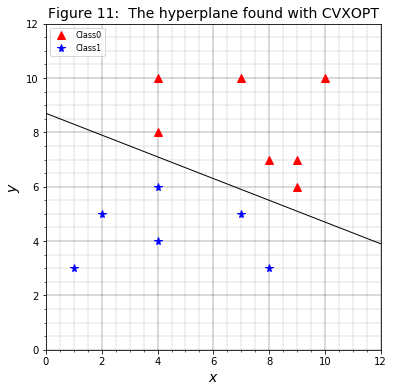

In [30]:
from succinctly.datasets import get_dataset, linearly_separable as ls
import numpy as np
import matplotlib.pyplot as plt

X, y = get_dataset(ls.get_training_examples)
x1= np.arange(0,13,1)

a0=X[0:7,0]
b0=X[0:7,1]
c0=X[8:14,0]
d0=X[8:14,1]

x_l= np.arange(0,12,1)
y_l= np.arange(0,12,1)


b1=b
a1= -w[0]/w[1]
c1=-b1/w[1]
y1=a1*x1+c1

fig = plt.figure(figsize=(6,6))

plt.plot(a0,b0,"r^",c0,d0,"b*",markersize=8)
plt.plot(x1,y1,'k',linewidth=1)

plt.title('Figure 11:  The hyperplane found with CVXOPT',fontsize=14)

plt.xlabel(r'$x$',fontsize=14)
plt.ylabel(r'$y$',fontsize=14)
# Turn on the minor TICKS, which are required for the minor GRID
plt.minorticks_on()

# Customize the major grid
plt.grid(which='major', linestyle='-', linewidth='0.3', color='black')
# Customize the minor grid

plt.grid(which='minor', linestyle=':', linewidth='0.3', color='black')
plt.legend(["Class0", "Class1"], loc="upper left",prop=dict(size=8))
plt.ylim(0,12)
plt.xlim(0,12)
plt.show()

When we plot the result in Figure 11, we see that the hyperplane is the optimal hyperplane. Contrary to the [The Perceptron](https://github.com/AnilSarode/Machine-Learning-Digital-Book-/blob/master/The%20Perceptron/The%20Perceptron%20.ipynb), the SVM will always return the same result.Even in Figure 12 we use same hyper plane on the test data and it work nicely.

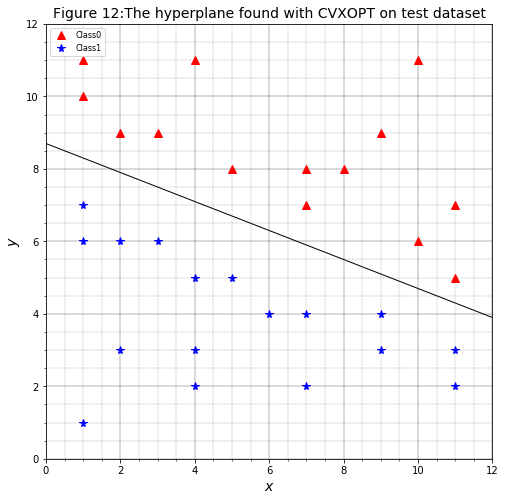

In [31]:
from succinctly.datasets import get_dataset, linearly_separable as ls
import numpy as np
import matplotlib.pyplot as plt


X, y = get_dataset(ls.get_test_examples)
x1= np.arange(0,13,1)

a0=X[0:14,0]
b0=X[0:14,1]
c0=X[15:32,0]
d0=X[15:32,1]

b1=b
a1= -w[0]/w[1]
c1=-b1/w[1]
y1=a1*x1+c1

x_l= np.arange(0,12,1)
y_l= np.arange(0,12,1)

fig = plt.figure(figsize=(8,8))

plt.plot(a0,b0,"r^",c0,d0,"b*",markersize=8)
plt.plot(x1,y1,'k',linewidth=1)

plt.title('Figure 12:The hyperplane found with CVXOPT on test dataset',fontsize=14)

plt.xlabel(r'$x$',fontsize=14)
plt.ylabel(r'$y$',fontsize=14)
# Turn on the minor TICKS, which are required for the minor GRID
plt.minorticks_on()

# Customize the major grid
plt.grid(which='major', linestyle='-', linewidth='0.3', color='black')
# Customize the minor grid

plt.grid(which='minor', linestyle=':', linewidth='0.3', color='black')
plt.legend(["Class0", "Class1"], loc="upper left",prop=dict(size=8))
plt.ylim(0,12)
plt.xlim(0,12)
plt.show()


This formulation of the SVM is called the **hard margin SVM.** It cannot work when the data is not linearly separable. There are several Support Vector Machines formulations. In the next chapter, we will consider another formulation called the **soft margin SVM**, which will be able to work when data is non-linearly separable because of outliers.

### 4.1.Summary <a class="anchor" id="4.1"></a>

Minimizing the norm of is a **convex optimization problem**, which can be solved using the Lagrange multipliers method. When there are more than a few examples, we prefer using convex optimization packages, which will do all the hard work for us.

We saw that the original optimization problem can be rewritten using a Lagrangian function. Then, thanks to duality theory, we transformed the Lagrangian problem into the Wolfe dual problem. We eventually used the package CVXOPT to solve the Wolfe dual.

## References <a class="anchor" id="r"></a>

* [1] [SUPPORT VECTOR MACHINES SUCCINCTLY By Alexandre Kowalczyk.](https://docplayer.net/85962521-By-alexandre-kowalczyk-foreword-by-daniel-jebaraj.html) 
* [2] [svm-succinctly](https://bitbucket.org/syncfusiontech/svm-succinctly/src/master/)
* [3] [SVM - Understanding the math-By Alexandre Kowalczyk](https://www.svm-tutorial.com/2014/11/svm-understanding-math-part-2/)
* [4] [SVM - Understanding the math - the optimal hyperplane-By Alexandre Kowalczyk](https://www.svm-tutorial.com/2015/06/svm-understanding-math-part-3/)